In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats
import math


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

import nltk

import statsmodels.api as sm

import pandas_datareader as pdr
from datetime import datetime
import requests
from io import StringIO


In [3]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/findlad/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stopwords=stopwords.words('english')

In [5]:
messages=[line.rstrip() for line in open ('SMSSpamCollection')]

In [9]:
print (len(messages))

5574


In [12]:
for num, message in enumerate(messages[:10]):
    print (num,message)
    print('/n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
/n
1 ham	Ok lar... Joking wif u oni...
/n
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
/n
3 ham	U dun say so early hor... U c already then say...
/n
4 ham	Nah I don't think he goes to usf, he lives around here though
/n
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
/n
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
/n
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
/n
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Cla

In [15]:
#tab delimited file, so use the \t as a seperator

messages=pd.read_csv('SMSSpamCollection',sep='\t',
                     names=['Labels','Messages'])

In [16]:
messages.head()

,Labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
messages.describe()

,Labels,Messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
messages.groupby('Labels').describe()

Messages                                                               
          count unique                                                top freq
Labels                                                                        
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [20]:
messages['Length']=messages['Messages'].apply(len)
messages.head()

,Labels,Messages,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

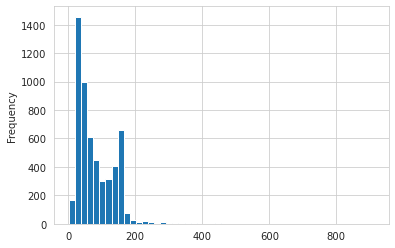

In [22]:
messages['Length'].plot(bins=50,kind='hist')

In [23]:
messages['Length'].describe() #one huge message, where is it?

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [26]:
#print the huge message
messages[messages['Length']==910]['Messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

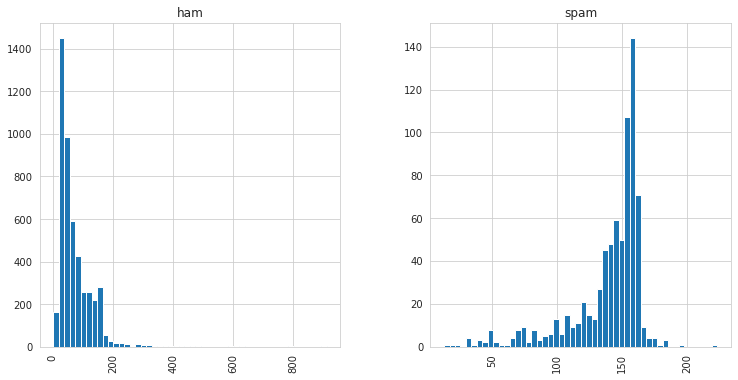

In [28]:
messages.hist(column='Length',by='Labels',bins=50,figsize=(12,6))

(0.0, 200.0)

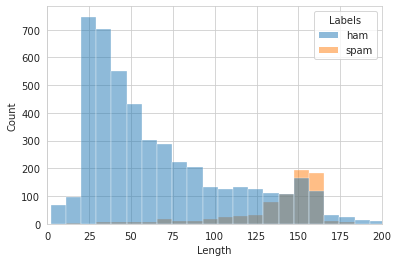

In [45]:
sns.histplot(data=messages, x= 'Length', hue='Labels',bins=100)
plt.xlim(0,200)

#looks like a character length of ~100 would seperate most of teh spam from the ham. What else can we do?

In [46]:
import string

In [47]:
#Removing punctuation

mess='Sample message! Notice it has punctuation?'

In [49]:
nopunc=[char for char in mess if char not in string.punctuation]

In [50]:
nopunc=''.join(nopunc)

In [51]:
nopunc

'Sample message Notice it has punctuation'

In [52]:
#some words are really common and can complicate the analysis, so lets remove them
from nltk.corpus import stopwords

In [53]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [54]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [55]:
cleanmess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [56]:
cleanmess

['Sample', 'message', 'Notice', 'punctuation']

In [62]:
#lets builkd a function to do this on any string
def text_process(message):
    #remove the punctuation from a message
    nopunc=[character for character in message if character not in string.punctuation]
    #join them back up into a string again
    nopunc=''.join(nopunc)
    #remove any of teh common words listed in stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [63]:
messages.head()

,Labels,Messages,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [65]:
#cool, it works. Tokenised! and only the useful words.
# tonnes of other things you can do, like expant shorthand, and equate verbs and nouns that are related, like drive and driving
messages['Messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Messages, dtype: object

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
#bag of words
bow_transformer = CountVectorizer(analyzer=text_process)

In [68]:
bow_transformer.fit(messages['Messages'])

CountVectorizer(analyzer=<function text_process at 0x7a7fa8e67820>)

In [69]:
#errors here are likely from uk pound symbols and suchlike that people dont commonly use in north america

In [70]:
message4=messages['Messages'][3]

In [72]:
print (message4)

U dun say so early hor... U c already then say...


In [75]:
#lets look at how many occourances of each word from the library we have in this particular message
bow4=bow_transformer.transform([message4])
print (bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [78]:
#lets look at what words it thinks were used twice and see if it jives
print (bow_transformer.get_feature_names()[4068])
print (bow_transformer.get_feature_names()[9554])
#this seems to be working properly, lets do the whole dataframe

U
say


In [79]:
messages_bow=bow_transformer.transform(messages['Messages'])

In [86]:
print ('Shape of Sparse Matrix: ',messages_bow.shape)
print ('Amount of non zero occourances: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / 
                             (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of non zero occourances:  50548
sparsity: 0.08%


In [89]:
from sklearn.feature_extraction.text import TfidfTransformer

In [90]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [92]:
tfidf4=tfidf_transformer.transform(bow4)
print (tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [95]:
#tfidf score for an individual word
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.2800524267409408


In [99]:
#tfidf on a whole list
messages_tfidf = tfidf_transformer.transform(messages_bow)
print (messages_tfidf.shape)

(5572, 11425)


In [101]:
#train a spam classifier. niave bayse works well

from sklearn.naive_bayes import MultinomialNB

In [103]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['Labels'])

In [104]:
#model has been trained, lets try it on a single entry
print ('predicted: ', spam_detect_model.predict(tfidf4)[0])
print ('expected: ',messages['Labels'][3])

predicted:  ham
expected:  ham


In [106]:
#boom, lets do it on everything
all_pred=spam_detect_model.predict(messages_tfidf)
print (all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [107]:
#how did we do? 
from sklearn.metrics import classification_report
print (classification_report(messages['Labels'],all_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [108]:
#bah, we havent done a train test split.
msgtrain, msgtest, labeltrain, labeltest= train_test_split(messages['Messages'],
                                                           messages['Labels'], test_size=0.2)

In [116]:
#lets make a pipeline so we dont have to type this all again
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('bow', CountVectorizer(analyzer=text_process)),
                                 ('tdidf',TfidfTransformer()),
                                 ('classifier',MultinomialNB())])



In [117]:
pipeline.fit(msgtrain,labeltrain)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7a7fa8e67820>)),
                ('tdidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [118]:
prediction=pipeline.predict(msgtest)

In [120]:
print (classification_report(prediction,labeltest))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1016
        spam       0.73      1.00      0.85        99

    accuracy                           0.97      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.98      0.97      0.97      1115

